NAME : Danny 

SURNAME : D'Agostino

NUMBER : 1247958

\vspace{5mm}


\vspace{5mm}


\vspace{5mm}


\vspace{5mm}


In [138]:
%matplotlib inline
from __future__ import division
from mlxtend.evaluate import plot_decision_regions
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.mixture import GMM
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from timeit import default_timer as timer
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

\vspace{5mm}


Loading dataset :

In [2]:
mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target

\vspace{5mm}


Taking only the first five classes :

In [3]:
delval = [5,6,7,8,9]
indexremove = []
print len(y)
for i in range(len(y)):
    if y[i] in delval:
        indexremove.append(i)
y1 = np.delete(y,indexremove)
x1 = np.delete(X,indexremove,axis=0)
print np.shape(x1),np.shape(y1) 

70000
(35735, 784) (35735,)


\vspace{5mm}


We take only 200 examples for each class :

In [4]:
d = np.column_stack((x1, y1))
subset0 = d[d[:,784] == 0]
subset0 = subset0[:200]
subset1 = d[d[:,784] == 1]
subset1 = subset1[:200]
subset2 = d[d[:,784] == 2]
subset2 = subset2[:200]
subset3 = d[d[:,784] == 3]
subset3 = subset3[:200]
subset4 = d[d[:,784] == 4]
subset4 = subset4[:200] 
m = np.concatenate((subset0,subset1,subset2,subset3,subset4), axis=0)
X = m[:,:784]
X_stan = preprocessing.scale(X)

In [134]:
y_n = m[:,784]

\vspace{5mm}


Computing clustering with K = 5 : 

In [160]:
clusterer = KMeans(n_clusters=5,init='random')
clusterer.fit(X_stan)

KMeans(copy_x=True, init='random', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

\vspace{5mm}

Now we plot the centroids:

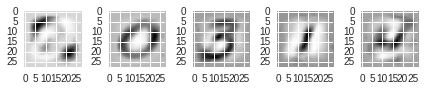

In [229]:
gs = gridspec.GridSpec(1, 5)
for i,j in enumerate(clusterer.cluster_centers_):
    plt.subplot(gs[i])
    im=np.reshape(j, (28, 28))
    iview = plt.imshow(im)
plt.tight_layout() 

\vspace{5mm}

The same thing for K = 10 and K = 3

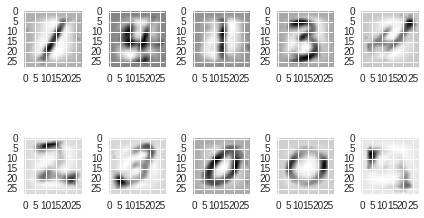

In [234]:
clusterer = KMeans(n_clusters=10,init='random')
clusterer.fit(X_stan)
gs = gridspec.GridSpec(2, 5)
for i,j in enumerate(clusterer.cluster_centers_):
    plt.subplot(gs[i])
    im=np.reshape(j, (28, 28))
    iview = plt.imshow(im)
plt.tight_layout() 

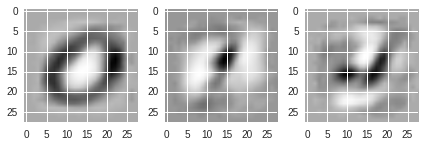

In [235]:
clusterer = KMeans(n_clusters=3,init='random')
clusterer.fit(X_stan)
gs = gridspec.GridSpec(1, 3)
for i,j in enumerate(clusterer.cluster_centers_):
    plt.subplot(gs[i])
    im=np.reshape(j, (28, 28))
    iview = plt.imshow(im)
plt.tight_layout() 

\vspace{5mm}

K-means it's one of the most famous clustering algorithm ; clustering algorithm involve to solve the problem of identyfing groups of data point in multidimensional space. And for every cluster/group we have the centroid, that is the representative point of all the points in that cluster. In our case we have five different groups of data point and if we compute K-means with K = 5, we can think that plotting the centroids we will have as a result all the five different digit 0,1,2,3 and 4. This is in general not true infact if we try to look at the centroids for K = 5, i can clearly recognize only the 0,3,1 and maybe the last one can be a 4, but i don't see the 2 representative. This because K-means algorithm most of time can only converge at a local minimum. 

\vspace{5mm}

Now computing clustering with GMM and evauate the clusters quality with purity. The purity is a measure for understand the quality of our cluster, and it is defined as : $$Purity = \frac{1}{N}\sum_{i = 1}^{k} \max_{j}\left | c_{i}\cap t_{j} \right |$$
where N is the number of data points, k the number of clusters, c is a cluster in C, and t is the classification which has the max count for cluster c. :

[[  2 198   0   0   0]
 [  8 192   0   0   0]
 [ 78 122   0   0   0]
 [ 60 140   0   0   0]
 [ 58 142   0   0   0]]
[[188  12   0   0   0]
 [188   2  10   0   0]
 [ 92  44  64   0   0]
 [112  41  47   0   0]
 [128  56  16   0   0]]
[[  2   7  17 174   0]
 [  1 190   9   0   0]
 [ 46  70  84   0   0]
 [ 21  69 105   5   0]
 [105  30  61   4   0]]
[[  7   0  14   6 173]
 [193   1   5   1   0]
 [ 27  24  70  78   1]
 [ 53   6  93  36  12]
 [ 42 129   6  22   1]]
[[  2 141  46  10   0   1]
 [190   0   5   3   1   1]
 [ 19   1  57  24  19  80]
 [ 22   0  31 121   2  24]
 [ 12   1   9   8 150  20]
 [  0   0   0   0   0   0]]
[[ 11   6 157   1   2  23   0]
 [  1   1   0   0  40   2 156]
 [ 18  82   0  12  24  64   0]
 [113  20   1   5  44  17   0]
 [ 39  12   0  84  27  23  15]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]
[[  0 110   0   9   1   0   4  76]
 [  2   0   1  25   0 172   0   0]
 [ 16   1  56  35  10   3  78   1]
 [  3   4  22  55  99   4  13   0]
 [140   1  20  

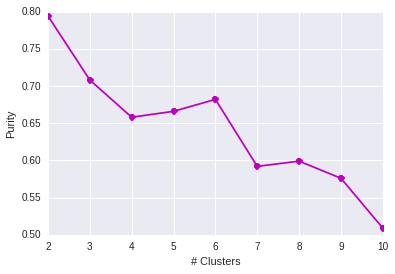

In [184]:
comp = [2,3,4,5,6,7,8,9,10]
p=[]
for j in comp:
    clusterer = GMM(n_components=j,covariance_type='diag')
    clusterer.fit(X_stan)
    cluster_labels = clusterer.predict(X_stan)
    c_matrix = confusion_matrix(y_n, cluster_labels)
    purity = 0
    l = []
    print c_matrix
    for k in c_matrix:
        m = max(k)
        l.append(m)
    purity = sum(l)/len(cluster_labels)
    p.append(purity)
plt.plot(comp,p,color='m',marker='o')
plt.xlabel('# Clusters')
plt.ylabel('Purity')
plt.title('')
plt.legend(loc='lower right')
sns.set_style("darkgrid")
plt.show()

\vspace{5mm}

Above we calculate the purity as the sum of the maximum value of each row in the confusion matrix, divided by the total number of data points. From this type of analysis we can evaluate that : if two element are considered similar they will on the same cluster. If we look at the confusion matrix when the number of the cluster are two, it's clear that most of elements (for each class) are considered similar and they stay on the same cluster, and also we achieve the maximum purity. More insteresting if we see the confusion matrix for # cluster equal to six where most of the elements stay only on five ( different cluster for each class ) of the six clusters, and this repartition is coherent with the avaiable knowledge of our dataset.

\vspace{5mm}

Now we construct GMM model for classification. We split the data set in 50% training, 25% test set and 25% validation set : 

In [163]:
c0 = preprocessing.scale(subset0)
c1 = preprocessing.scale(subset1)
c2 = preprocessing.scale(subset2)
c3 = preprocessing.scale(subset3)
c4 = preprocessing.scale(subset4)
tr0 = c0[0:100]
te0 = c0[100:150]
tv0 = c0[100:150]
tr1 = c1[0:100]
te1 = c1[100:150]
tv1 = c1[150:200]
tr2 = c2[0:100]
te2 = c2[100:150]
tv2 = c2[150:200]
tr3 = c3[0:100]
te3 = c3[100:150]
tv3 = c3[150:200]
tr4 = c4[0:100]
te4 = c4[100:150]
tv4 = c4[150:200]
xval = np.concatenate((tv0,tv1,tv2,tv3,tv4), axis=0)
xtes = np.concatenate((te0,te1,te2,te3,te4), axis=0)

\vspace{5mm}

We fit the GMM for each class and for every test point we evaluate the log-likelihood, and decide the class label for which the test point achieve the maximum.

In [164]:
mixcomp = [2,3,4,5]
clx = [tr0,tr1,tr2,tr3,tr4]
ypr=[]
yy = []
for nmix in mixcomp:
    clusterer = GMM(n_components=nmix,covariance_type='diag')
    clusterer.fit(tr0)
    k0 = clusterer.score_samples(xval)
    k0 = k0[0].tolist()
    clusterer.fit(tr1)
    k1 = clusterer.score_samples(xval)
    k1 = k1[0].tolist()
    clusterer.fit(tr2)
    k2 = clusterer.score_samples(xval)
    k2 = k2[0].tolist()
    clusterer.fit(tr3)
    k3 = clusterer.score_samples(xval)
    k3 = k3[0].tolist()
    clusterer.fit(tr4)
    k4 = clusterer.score_samples(xval)
    k4 = k4[0].tolist()
    ypr=[]
    for i in range(len(k0)):
        if k0[i] > k1[i] and k0[i] > k2[i] and k0[i] > k3[i] and k0[i] > k4[i]:
            ypr.append(0)
        if k0[i] < k1[i] and k1[i] > k2[i] and k1[i] > k3[i] and k1[i] > k4[i]:
            ypr.append(1)
        if k0[i] < k2[i] and k1[i] < k2[i] and k2[i] > k3[i] and k2[i] > k4[i]:
            ypr.append(2)
        if k0[i] < k3[i] and k1[i] < k3[i] and k2[i] < k3[i] and k3[i] > k4[i]:
            ypr.append(3)
        if k0[i] < k4[i] and k1[i] < k4[i] and k2[i] < k4[i] and k3[i] < k4[i]:
            ypr.append(4)
    yy.append(ypr)

\vspace{5mm}

I need to recreate the target array for compute the accuracy on the validation set : 

In [168]:
y_true = []
for z in [0,1,2,3,4] :
    for k in range(50):
        y_true.append(z)
for k in yy:
    print accuracy_score(y_true, k)

0.804
0.816
0.824
0.812


\vspace{5mm}

We achieve the maximum accuracy when the numbers of the component are 4, and we compute the accuracy on the test set:

In [169]:
clusterer = GMM(n_components=nmix,covariance_type='diag')
clusterer.fit(tr0)
k0 = clusterer.score_samples(xtes)
k0 = k0[0].tolist()
clusterer.fit(tr1)
k1 = clusterer.score_samples(xtes)
k1 = k1[0].tolist()
clusterer.fit(tr2)
k2 = clusterer.score_samples(xtes)
k2 = k2[0].tolist()
clusterer.fit(tr3)
k3 = clusterer.score_samples(xtes)
k3 = k3[0].tolist()
clusterer.fit(tr4)
k4 = clusterer.score_samples(xtes)
k4 = k4[0].tolist()
ypr=[]
for i in range(len(k0)):
    if k0[i] > k1[i] and k0[i] > k2[i] and k0[i] > k3[i] and k0[i] > k4[i]:
        ypr.append(0)
    if k0[i] < k1[i] and k1[i] > k2[i] and k1[i] > k3[i] and k1[i] > k4[i]:
        ypr.append(1)
    if k0[i] < k2[i] and k1[i] < k2[i] and k2[i] > k3[i] and k2[i] > k4[i]:
        ypr.append(2)
    if k0[i] < k3[i] and k1[i] < k3[i] and k2[i] < k3[i] and k3[i] > k4[i]:
        ypr.append(3)
    if k0[i] < k4[i] and k1[i] < k4[i] and k2[i] < k4[i] and k3[i] < k4[i]:
        ypr.append(4)
print accuracy_score(y_true, ypr)

0.78


\vspace{5mm}

GMM classifier and SVM are completely different methods for classify data. The first is a generative model the second it's discriminative. 
With GMM as a classifier to determine the class of the digit, the 'machine' learn how digit is for each class and after determine in which class the digit belong. With SVM we have a much simple approach infact we determine the difference between every digits, without learning how is the digit for every specific class. Also, another important difference, is that the SVM don't estimate any probabilities, and much important, don't make any considerations about the density distribution of the data. But in general, discriminative approaches suffer the problem to overfit the data, but the SVM, if the hyperparameters are tuned well, don't have any problem with overfitting, because are 'created' for minimize the structural risk instead the empirical risk like in the neural networks model, and in this case SVM achieve an accuracy greater than GMM on the test set (but this result cannot be really significant because the size of the training and test set is different for the two classifier, but we can say that SVM is one of the best learning algorithm for classify data). 